<a href="https://colab.research.google.com/github/JamshedAli18/Scikit-learn-Algorithms-practice/blob/main/LogisticRegression(_multi_class_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a large DataFrame with synthetic data
np.random.seed(42)  # For reproducibility

# Simulate data
n_samples = 100000  # Large dataset
age = np.random.randint(18, 70, size=n_samples)  # Age between 18 and 70
income = np.random.randint(20000, 120000, size=n_samples)  # Income between $20k and $120k
product_interest = np.random.rand(n_samples)  # Interest in product (0 to 1 scale)
browsing_time = np.random.randint(1, 30, size=n_samples)  # Browsing time in minutes
previous_purchases = np.random.randint(0, 10, size=n_samples)  # Number of previous purchases

# Target variable: spending category
# We'll create 3 classes: 0 (Low Spender), 1 (Medium Spender), 2 (High Spender)
spending_category = np.select(
    [
        (income < 40000),
        (income >= 40000) & (income < 80000),
        (income >= 80000)
    ],
    [0, 1, 2], default=0
)

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Product_Interest': product_interest,
    'Browsing_Time': browsing_time,
    'Previous_Purchases': previous_purchases,
    'Spending_Category': spending_category
})



In [2]:
df.head()

,Age,Income,Product_Interest,Browsing_Time,Previous_Purchases,Spending_Category
0,56,48339,0.638182,29,5,1
1,69,80673,0.705588,22,1,2
2,46,35320,0.427477,19,8,0
3,32,54228,0.610268,4,7,1
4,60,79914,0.206745,23,2,1


In [3]:
# Step 2: Split the data into features and target
X = df.drop('Spending_Category', axis=1)
y = df['Spending_Category']


In [4]:
# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# Step 4: Apply logistic regression for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [6]:
# Step 5: Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of multi-class logistic regression model: {accuracy:.2f}")


Accuracy of multi-class logistic regression model: 0.74


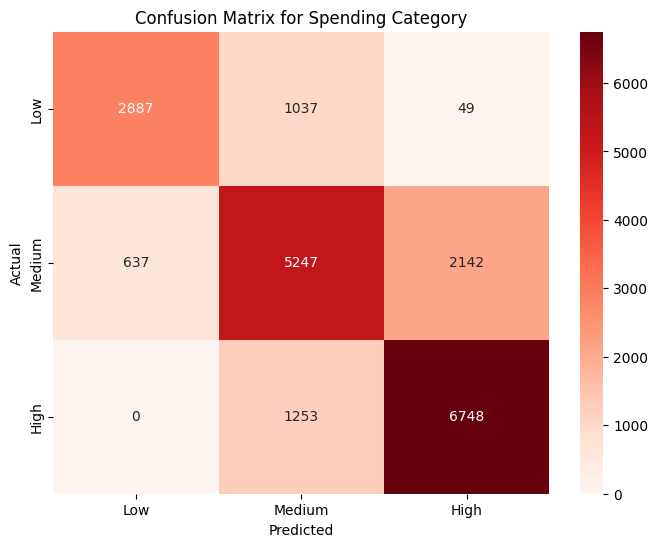

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=True,
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Spending Category')
plt.show()